In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Steup data frame and dates for daily precipitation data by year
year = 2012
df = pd.DataFrame(columns=['station'])
dts = pd.date_range(str(year) + "-01-01", str(year) + "-12-31", freq="D")

In [3]:
# Retrieve precipitation data for year and merge into dataframe
for dt in dts:
    d = str(dt.date())
    dt_df = pd.read_csv(f'outputs/prcp/{year}/csv/{d}.csv')
    df = df.merge(dt_df, on='station', how='outer')

In [4]:
# Add Station Information to Dataframe
stn_df = pd.read_csv(f'outputs/prcp/{year}/CA_{year}_coords.csv')
df = df.merge(stn_df, on='station')
df

,station,2012-01-01,2012-01-02,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-07,2012-01-08,2012-01-09,...,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31,lat,lon,elev,name
0,US1CAAL0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.7,2.3,0.0,2.5,0.0,0.0,37.8123,-122.2160,113.4,CA PIEDMONT 1.0 SE
1,US1CAAL0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,37.7075,-122.0687,87.5,CA CASTRO VALLEY 0.5 WSW
2,US1CAAL0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.8,1.8,0.0,2.0,0.0,0.0,37.7169,-122.0585,163.4,CA CASTRO VALLEY 0.4 NNE
3,US1CAAL0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,1.0,0.0,3.6,0.0,0.0,37.6483,-121.8745,107.0,CA PLEASANTON 1.8 SSE
4,US1CAAL0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.1,NaN,NaN,1.8,NaN,NaN,37.8319,-122.2503,58.2,CA OAKLAND 4.4 NNW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,USW00093241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38.3775,-121.9586,31.7,CA VACAVILLE/NUT TREE AP ASOS
1008,USW00093242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.4,0.0,0.0,0.0,0.0,0.0,36.9850,-120.1106,76.5,CA MADERA MUNI AP
1009,USW00093243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.2381,-120.8825,23.8,CA MERCED 23 WSW CRN
1010,USW00093245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.1,0.3,12.3,2.8,0.0,0.5,38.3208,-123.0747,19.2,CA BODEGA 6 WSW CRN


In [5]:
date_columns = df.columns[1:366]  # Adjust this if necessary

# Convert the daily columns to numeric (if they are not already)
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Initialize a dictionary to hold the monthly data
monthly_data = {}

# Iterate over each station
for station in df.index:
    monthly_totals = []
    for month in range(1, 13):
        # Generate the date range for the current month
        days_in_month = pd.date_range(f'2012-{month:02d}-01', periods=31)  # Adjust periods for different months if necessary
        days_in_month = days_in_month[days_in_month.month == month]  # Ensure only the current month is included
        
        # Find the corresponding columns in the DataFrame
        daily_columns = [col for col in df.columns if col in days_in_month.strftime('%Y-%m-%d')]
        
        # Sum the daily values for the current month
        monthly_total = df.loc[station, daily_columns].sum()
        monthly_totals.append(monthly_total)
    
    monthly_data[station] = monthly_totals

# Create a new DataFrame with the monthly totals
monthly_df = pd.DataFrame(monthly_data, index=[f'2012-{month:02d}' for month in range(1, 13)]).T

# Add the metadata columns back to the new DataFrame
metadata_columns = ['lat', 'lon', 'elev', 'name']  # Adjust this list based on your actual DataFrame
monthly_df = pd.concat([monthly_df, df[metadata_columns]], axis=1)

# Remove rows with NaN values
monthly_df = monthly_df.dropna()

# Sum each month
monthly_sums2012 = monthly_df.sum(axis=0)

# Display the resulting DataFrame and the monthly sums
print(monthly_df)
print(monthly_sums2012)

      2012-01  2012-02  2012-03  2012-04  2012-05  2012-06  2012-07  2012-08  \
0        91.0     31.9    220.4    110.1      2.0      3.8      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        69.7     27.9    138.2     94.9      0.8      4.6      0.0      0.0   
3        67.9      0.5     52.5     80.2      1.0      2.5      0.0      0.0   
4        89.9     28.9    212.4     88.0      0.0      3.6      1.6      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1007    121.9     32.2    187.1     57.6      0.0      1.0      0.0      0.0   
1008     21.6     11.7     82.2     40.5      0.0      2.3      0.0      0.0   
1009     19.5      5.7     37.7     19.6      0.0      5.3      0.0      0.0   
1010    160.0     37.9    154.6     41.3      9.1      3.7      5.6      2.0   
1011     20.5     23.6     28.0     41.8     22.7     12.6      0.0      1.5   

      2012-09  2012-10  2012-11  2012-1

In [6]:
# Select only the monthly columns (assuming the last few columns are metadata and not needed here)
monthly_sums2012 = monthly_sums2012.iloc[:12]

# Create a dictionary to map month numbers to abbreviations
month_mapping = {
    '2012-01': 'Jan', '2012-02': 'Feb', '2012-03': 'Mar', '2012-04': 'Apr',
    '2012-05': 'May', '2012-06': 'Jun', '2012-07': 'Jul', '2012-08': 'Aug',
    '2012-09': 'Sep', '2012-10': 'Oct', '2012-11': 'Nov', '2012-12': 'Dec'
}

# Rename the Series index using the month mapping
monthly_sums2012.index = monthly_sums2012.index.map(month_mapping)

# Convert millimeters to inches and round to 2 decimal places
monthly_sums2012 = (monthly_sums2012 * 0.0393701).round(2)

monthly_sums2012

Jan    2893.993689
Feb    1209.858921
Mar     4814.27819
Apr    2457.284791
May     165.574893
Jun     262.259984
Jul     114.496125
Aug     138.610311
Sep      41.885849
Oct     926.287902
Nov    3647.068899
Dec    6328.090031
dtype: object

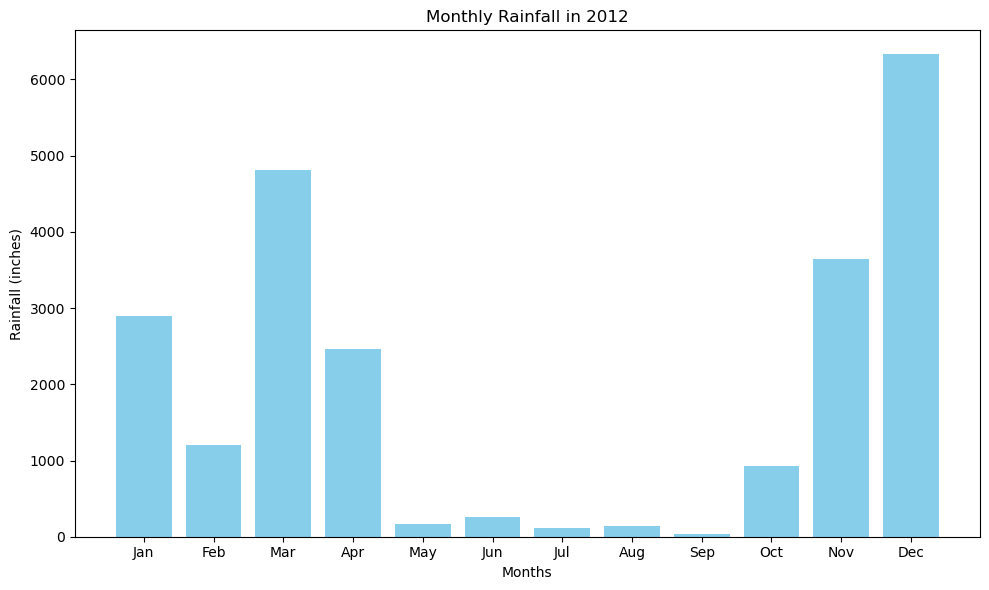

In [7]:
# Extract months and rainfall values from monthly_sums2016
months = list(monthly_sums2012.index)
rainfall_values = list(monthly_sums2012.values)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, rainfall_values, color='skyblue')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Rainfall (inches)')
plt.title('Monthly Rainfall in 2012')

# Adjust layout for better appearance
plt.tight_layout()

# Define output path and create directory if it doesn't exist
output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = output_path / "Monthly_Rainfall_2012.png"
plt.savefig(output_file)

# Show the plot
plt.show()